## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

## Loading Data

In [2]:
data = pd.read_csv("student-mat.csv", sep=";") #sep is added bcz data is seperated by ';' and csv reads data 
                                              # seperated by ','
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Cleaning data

In [3]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


## Labels and Features


In [4]:
predict = "G3"  #<-- G3 is the label in this secenario

X = np.array(data.drop(columns = [predict])) #Features
y = np.array(data[predict]) #labels
print(len(X))

395


## Splitting the dataset and training

In [40]:
linear = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

#best = 0
#for _ in range(30):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
    
#    linear.fit(X_train, y_train)
#    acc = linear.score(X_test, y_test)

#    #print("Co", linear.coef_ )
#    #print("Intercept", linear.intercept_)
#    if acc > best:
#        best = acc
#        with open("student.pickle", "wb") as f:
#            pickle.dump(linear, f)
#print(best)


In [41]:
pickle_in = open("student.pickle", "rb")
linear = pickle.load(pickle_in)

## Prediction

In [42]:
predictions = linear.predict(X_test)
print(predictions)

[12.61916425 14.89097298  7.00825208  3.72942403 14.37822981  7.01093036
  7.78268622  5.44029548 15.62981846  4.65000145 11.83205351 16.27049891
 11.80332504 -0.99094231 -0.50894325 10.7136684   7.15791081  7.58677786
 15.10117025 16.25777716  8.29542939  6.75007655 14.02419022 10.63722482
 14.78594776 19.92497169 16.1399285   6.7850699   9.57614982 12.82936153
 15.25082898 15.68390013  8.73172897 16.32135214 -0.8082607  19.15381114
 14.02419022 11.93385029 18.4402737  14.25029253]


In [47]:
new = [[round(predictions[x], 2), y_test[x]] for x in range(len(predictions))]

In [49]:
for _ in new:
    print(_)

[12.62, 14]
[14.89, 16]
[7.01, 0]
[3.73, 5]
[14.38, 15]
[7.01, 6]
[7.78, 8]
[5.44, 7]
[15.63, 15]
[4.65, 5]
[11.83, 11]
[16.27, 16]
[11.8, 13]
[-0.99, 0]
[-0.51, 0]
[10.71, 11]
[7.16, 9]
[7.59, 7]
[15.1, 15]
[16.26, 16]
[8.3, 10]
[6.75, 10]
[14.02, 14]
[10.64, 10]
[14.79, 15]
[19.92, 19]
[16.14, 15]
[6.79, 7]
[9.58, 10]
[12.83, 12]
[15.25, 15]
[15.68, 15]
[8.73, 10]
[16.32, 16]
[-0.81, 0]
[19.15, 18]
[14.02, 13]
[11.93, 14]
[18.44, 19]
[14.25, 14]


## Plotting

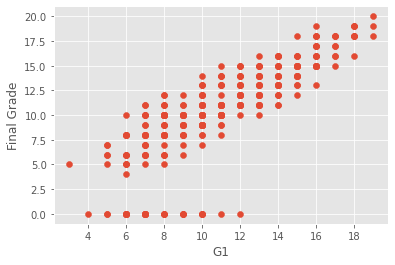

In [53]:
p = "G1"
#style.use("ggplot")
plt.scatter(data[p] ,data[predict])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()

In [55]:
data[p]

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64